In [1]:
import pandas as p
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from fairlearn.reductions import ExponentiatedGradient
from fairlearn.metrics import demographic_parity_ratio
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import os
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix



# DATA STRUCTURE

In [2]:
# First, we import the pandas library and give it the alias 'pd'. This alias simplifies subsequent calls to pandas functions,
# adhering to a widely recognized convention in the Python data science community.
import pandas as pd

# Using pandas' read_csv function, we load data from a CSV file named "CHURN.csv" into a DataFrame. A DataFrame is a two-dimensional,
# size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). Here, 'CHURN' becomes the
# variable holding our DataFrame. This operation assumes "CHURN.csv" is located in the same directory as the notebook or Python script.
CHURN = pd.read_csv("CHURN.csv")

# To verify that the dataset has been loaded correctly and to get a preliminary glimpse into its structure, we display the first
# five rows using the DataFrame's head() method. This method is invaluable for quickly checking the data's appearance, including
# column names and the types of data contained within those columns.
print(CHURN.head())


   RowNumber  CustomerId   Surname  CreditScore Country  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619  France  Female   42       2   
1          2    15647311      Hill          608   Spain  Female   41       1   
2          3    15619304      Onio          502  France  Female   42       8   
3          4    15701354      Boni          699  France  Female   39       1   
4          5    15737888  Mitchell          850   Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  ActiveMember  EstimatedSalary  Exited  
0       0.00              1          1             1        101348.88       1  
1   83807.86              1          0             1        112542.58       0  
2  159660.80              3          1             0        113931.57       1  
3       0.00              2          0             0         93826.63       0  
4  125510.82              1          1             1         79084.10       0  


         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  ActiveMember  \
count   10000.000000   10000.000000  10000.00000  10000.000000   
mean    76485.889288       1.530200      0.70550      0.515100   
std     62397.405202       0.581654      0.45584      0.499797   
min         0.000000       1.0000

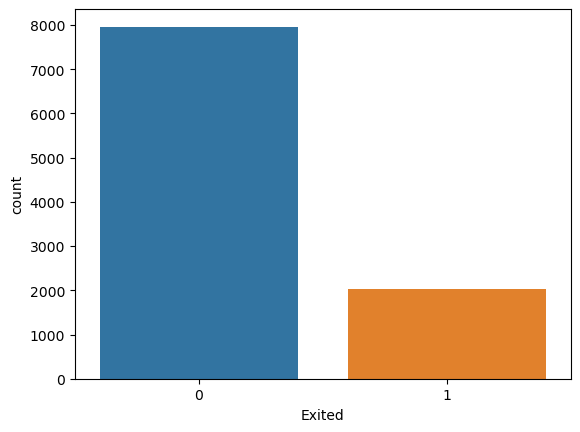

In [3]:
# Generate and display summary statistics for numerical columns in the DataFrame.
# This includes count, mean, standard deviation, minimum and maximum values, and the 25th, 50th (median), and 75th percentiles.
# It's a quick way to understand the scale, center, and spread of your numerical data.
print(CHURN.describe())

# Detect and summarize missing values across all columns. This step is crucial for data cleaning and preparation.
# A high number of missing values in a column may require imputation strategies or even dropping the column, depending on the analysis.
print(CHURN.isnull().sum())

# Visualize the distribution of the 'Exited' column, which is the target variable in this context.
# This visualization helps grasp the balance or imbalance between the classes in binary classification tasks.
sns.countplot(x='Exited', data=CHURN)
plt.show()


# EXPLORATORY DATA ANALYSIS

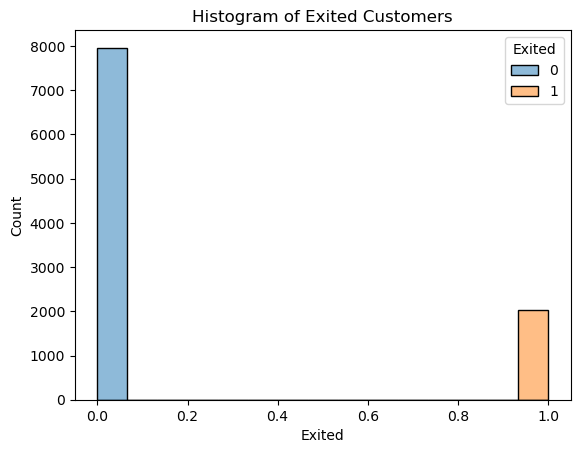

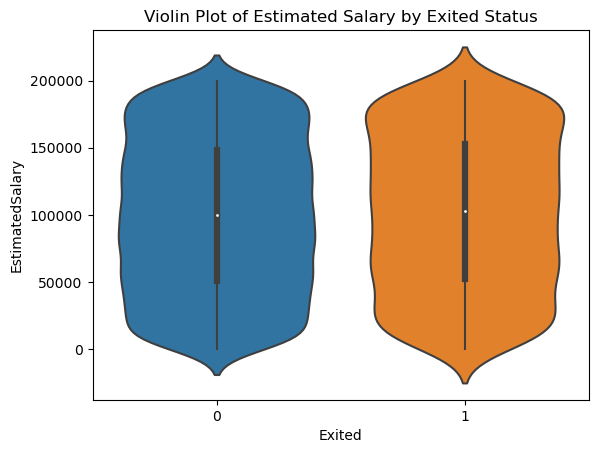

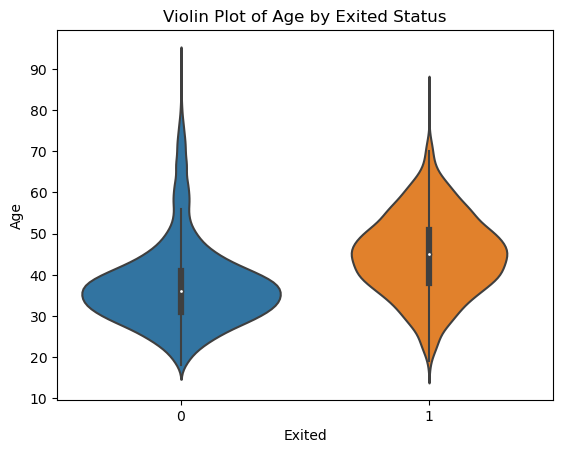

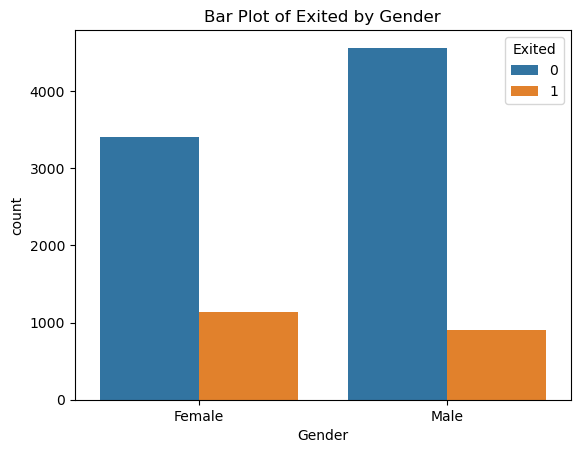

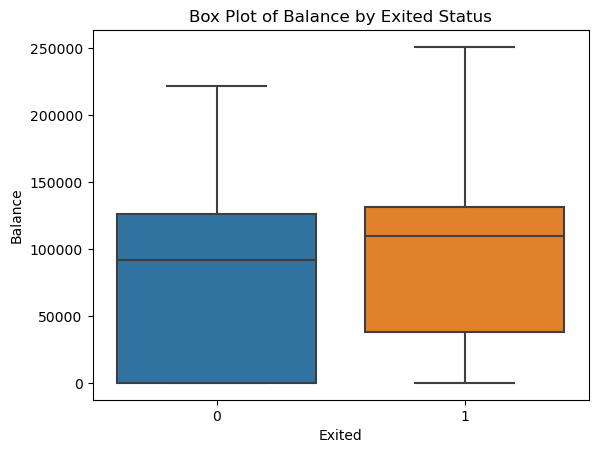

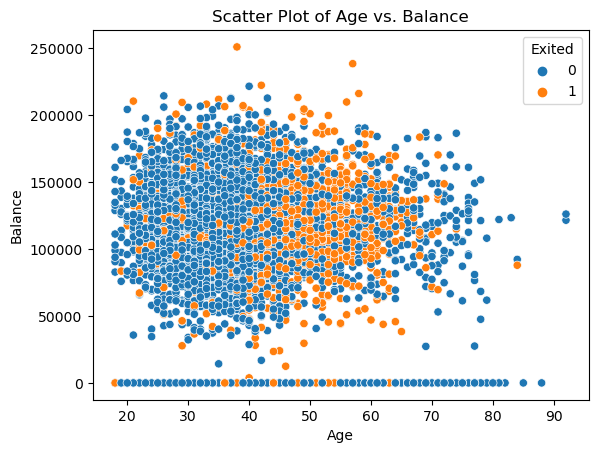

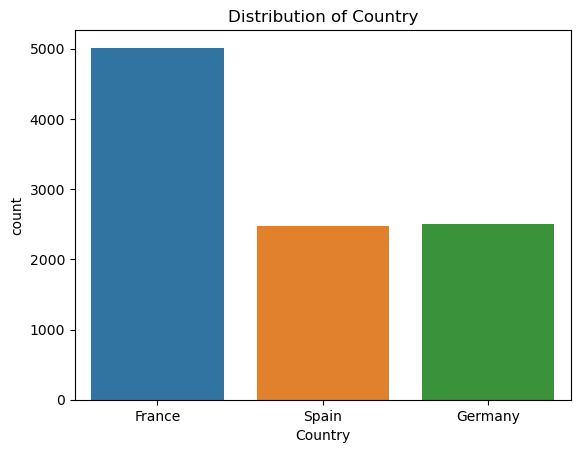

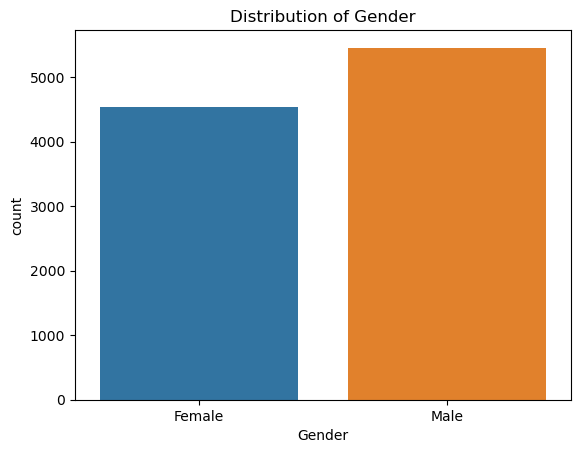

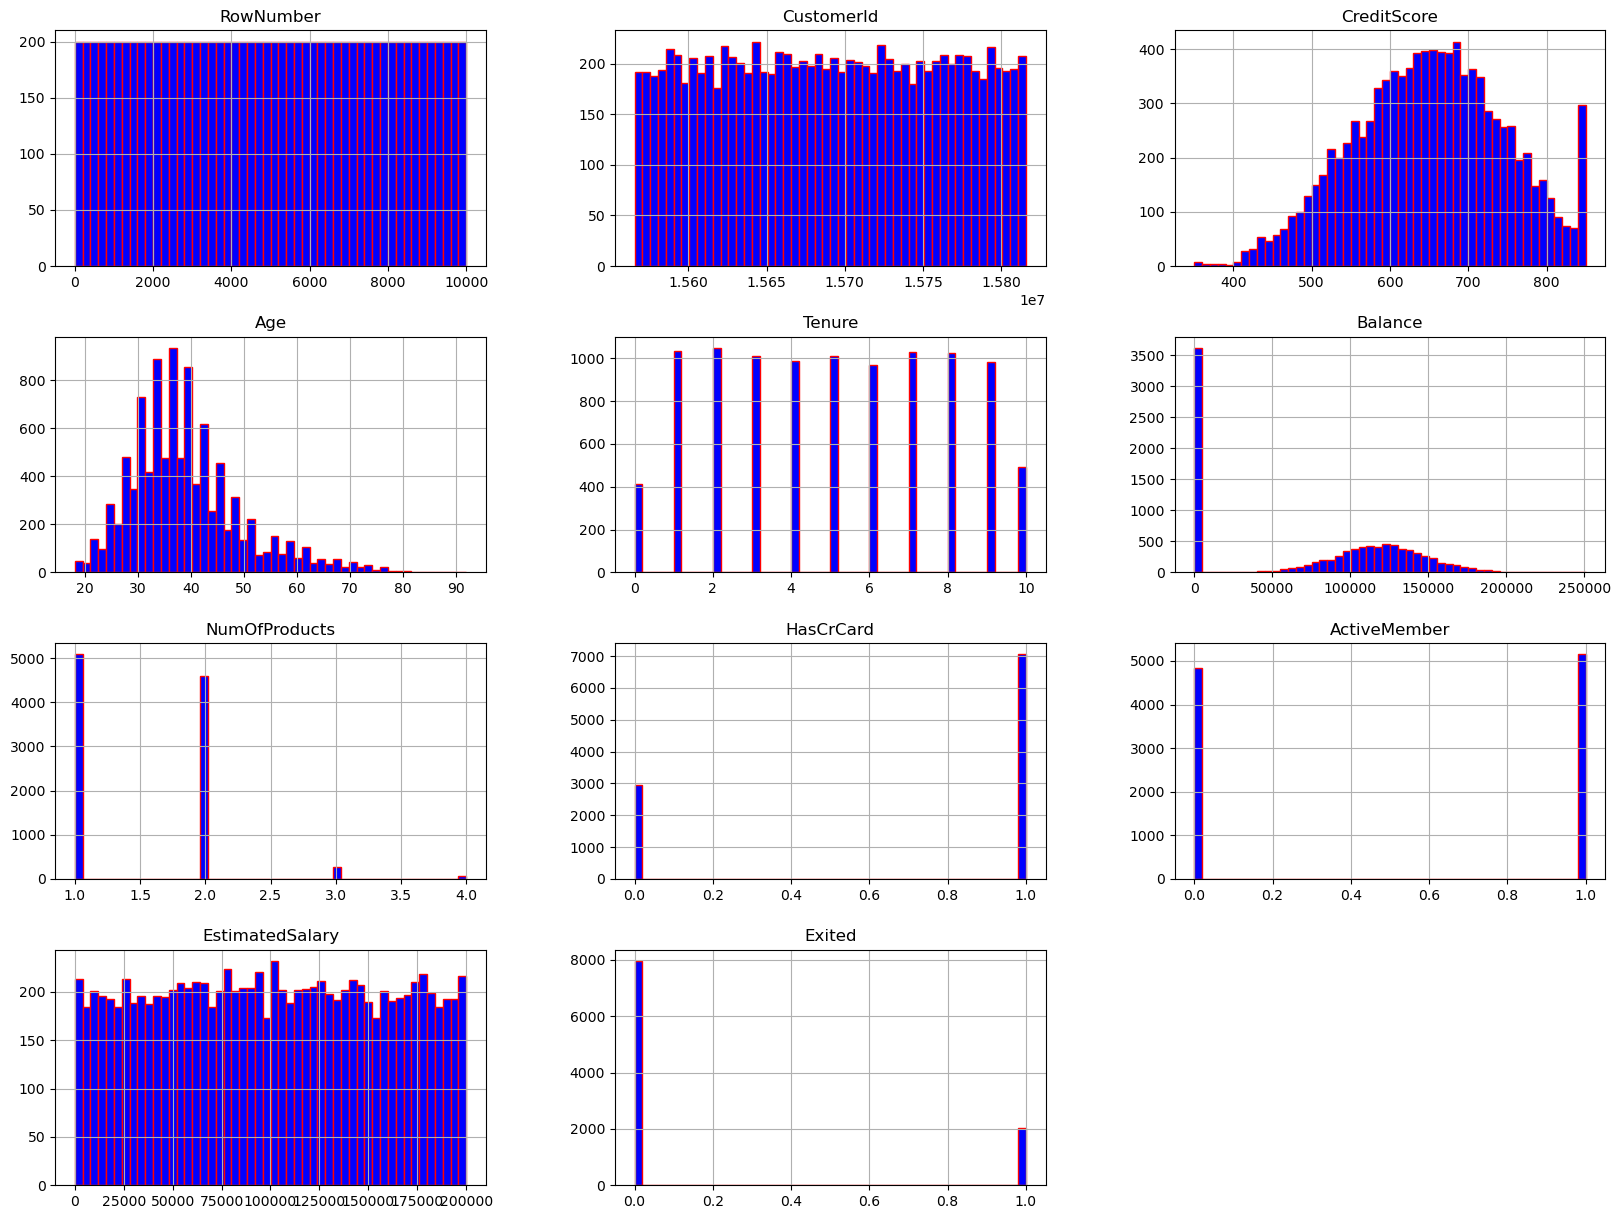

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Utilize the seaborn library's histplot function to create a histogram. This particular histogram
# is designed to show the distribution of customers based on their 'Exited' status from the CHURN DataFrame.
# The 'x' parameter specifies that we're examining the 'Exited' column, and the 'hue' parameter is also set to 'Exited'.
# This means the data will be colored (or 'hued') based on the 'Exited' values, essentially grouping the same values together.
sns.histplot(data=CHURN, x='Exited', hue='Exited')

# Set the title of the plot to 'Histogram of Exited Customers' using matplotlib's title function. This provides
# a clear, descriptive title at the top of the histogram, informing viewers exactly what the plot represents.
plt.title('Histogram of Exited Customers')

# Display the plot with matplotlib's show function. This command ensures that the histogram
# is rendered and visible in the output, allowing us to visually assess the distribution of customers who have exited.
plt.show()

# Create a violin plot visualizing the distribution of 'EstimatedSalary' split by 'Exited' status.
# Violin plots combine aspects of box plots and density plots, showing data distribution and probability density.
sns.violinplot(x='Exited', y='EstimatedSalary', data=CHURN)
plt.title('Violin Plot of Estimated Salary by Exited Status')
plt.show()

# Create another violin plot for 'Age' split by 'Exited' status to visualize how age distribution
# differs between customers who exited and those who didn't.
sns.violinplot(x='Exited', y='Age', data=CHURN)
plt.title('Violin Plot of Age by Exited Status')
plt.show()

# Generate a bar plot showing the count of 'Exited' customers, separated by 'Gender'.
# This helps in understanding if there's a significant difference in exit rates between genders.
sns.countplot(x='Gender', hue='Exited', data=CHURN)
plt.title('Bar Plot of Exited by Gender')
plt.show()

# Box Plot for visualizing the distribution of 'Balance' for customers, categorized by their 'Exited' status.
# Box plots are useful for identifying outliers and understanding the spread of the data.
sns.boxplot(x='Exited', y='Balance', data=CHURN)
plt.title('Box Plot of Balance by Exited Status')
plt.show()


# Scatter Plot visualizing the relationship between 'Age' and 'Balance', colored by 'Exited' status.
# This plot can help identify patterns or clusters related to customer exit behavior.
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=CHURN)
plt.title('Scatter Plot of Age vs. Balance')
plt.show()

# Create a bar plot for the 'Country' column
sns.countplot(x='Country', data=CHURN)
plt.title('Distribution of Country')
plt.show()

# Create a bar plot for the 'Gender' column
sns.countplot(x='Gender', data=CHURN)
plt.title('Distribution of Gender')
plt.show()

CHURN.hist(bins=50, figsize=(20, 15), color='blue', edgecolor='red')
plt.show()

# PREPROCESSING OF DATA

In [5]:
import pandas as pd
import numpy as np


# Checking for missing rows:
# This code snippet will print the number of missing rows by checking each row for any NaN values and summing up those rows.
missing_rows = CHURN.isnull().any(axis=1).sum()
print(f"Number of rows with at least one missing value: {missing_rows}")

# Checking for missing columns:
# Here, we're checking each column in the DataFrame for any missing values and then summing up those columns.
missing_columns = CHURN.isnull().any().sum()
print(f"Number of columns with at least one missing value: {missing_columns}")

# Checking for NaN values in the entire DataFrame:
# This statement calculates the total number of NaN values across the entire DataFrame.
total_nan_values = CHURN.isnull().sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan_values}")

# Identifying potential outliers using the Interquartile Range (IQR) method for numeric columns:
for column in CHURN.select_dtypes(include=np.number).columns:
    Q1 = CHURN[column].quantile(0.25)  # First quartile (Q1)
    Q3 = CHURN[column].quantile(0.75)  # Third quartile (Q3)
    IQR = Q3 - Q1  # Interquartile range (IQR)
    
# Defining outliers as those values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    outliers = CHURN[(CHURN[column] < (Q1 - 1.5 * IQR)) | (CHURN[column] > (Q3 + 1.5 * IQR))][column]
    print(f"Number of potential outliers in '{column}': {len(outliers)}")

# Count the occurrence of each unique category in 'Gender'
print("Gender distribution:\n", CHURN['Gender'].value_counts())

# Count the occurrence of each unique category in 'Country'
print("\nCountry distribution:\n", CHURN['Country'].value_counts())


Number of rows with at least one missing value: 0
Number of columns with at least one missing value: 0
Total number of NaN values in the DataFrame: 0
Number of potential outliers in 'RowNumber': 0
Number of potential outliers in 'CustomerId': 0
Number of potential outliers in 'CreditScore': 15
Number of potential outliers in 'Age': 359
Number of potential outliers in 'Tenure': 0
Number of potential outliers in 'Balance': 0
Number of potential outliers in 'NumOfProducts': 60
Number of potential outliers in 'HasCrCard': 0
Number of potential outliers in 'ActiveMember': 0
Number of potential outliers in 'EstimatedSalary': 0
Number of potential outliers in 'Exited': 2037
Gender distribution:
 Gender
Male      5457
Female    4543
Name: count, dtype: int64

Country distribution:
 Country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [6]:
# HANDLING OF OUTLIERS , DROPPING OF UNNECESSARY VARIABLES AND NORMALIZATION

from scipy.stats.mstats import winsorize

# First, calculate the first (Q1) and third (Q3) quartiles of the 'Age' column. 
# These quartiles represent the 25th and 75th percentiles of the data, respectively,
# providing a view of the distribution's middle portion. 
# The Interquartile Range (IQR), which is Q3 minus Q1, measures the middle 50% of the data,
# offering insight into its variability beyond average trends.
Q1 = CHURN['Age'].quantile(0.25)
Q3 = CHURN['Age'].quantile(0.75)
IQR = Q3 - Q1

# Next, we define the upper and lower limits for what we consider acceptable values in the 'Age' data.
# These caps are set at 1.5 times the IQR above Q3 and below Q1, respectively. 
# This choice of 1.5 is a common rule of thumb that balances sensitivity to outliers 
# with the risk of excluding too many data points.
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# With the boundaries defined, we then apply capping to the 'Age' data.
# Values above the upper limit are replaced with the upper limit value, and values below the lower limit 
# are replaced with the lower limit value. This approach effectively reduces the impact of extreme outliers 
# on the analysis by bringing them within a defined range, while preserving the overall distribution of the data.
# The np.where function is a versatile tool for this, allowing conditional replacements based on the limits we set.
CHURN['Age'] = np.where(CHURN['Age'] > upper_limit, upper_limit, 
                       np.where(CHURN['Age'] < lower_limit, lower_limit, CHURN['Age']))

# Import the winsorize function from the scipy.stats.mstats module.
# This function is specifically designed for dealing with outliers in a way that preserves the bulk of the data.
from scipy.stats.mstats import winsorize

# Apply Winsorization to the 'CreditScore' column of the CHURN DataFrame.
# The limits parameter is set to [0.05, 0.05], meaning that the lowest 5% of CreditScore values 
# will be set to the value at the 5th percentile, and the highest 5% of CreditScore values 
# will be set to the value at the 95th percentile. This effectively trims the tails of the CreditScore
# distribution, reducing the impact of extremely low or high outliers.
# This step is crucial for datasets where outliers might skew the analysis or modeling process, 
# as it creates a more normalized distribution without removing data points from the dataset.
CHURN['CreditScore'] = winsorize(CHURN['CreditScore'], limits=[0.05, 0.0])

# Winsorizing 'NumOfProducts' to handle extreme values.
# We apply winsorization to limit extreme outliers in the 'NumOfProducts' feature. 
# The limits=[0.01, 0.01] parameter indicates that we are capping the bottom 1% and the top 1% of values, 
# replacing them with the nearest value within the acceptable range. This method helps reduce the skewness
# caused by very high or low values without completely removing these data points, preserving the dataset's integrity.
CHURN['NumOfProducts'] = winsorize(CHURN['NumOfProducts'], limits=[0.01, 0.01])

# Drop the unnecessary variables
# Here, 'RowNumber', 'CustomerId', and 'Surname' are identified as columns that do not contribute to the predictive power of future models.
# 'RowNumber' is likely just a sequential index without any meaningful relationship to the target variable.
# 'CustomerId' is a unique identifier for each customer, which, while useful for tracking individuals, does not hold predictive value.
# 'Surname', representing the last name of customers, is also not relevant for predicting outcomes in this context.
# These columns are removed from the DataFrame to simplify the dataset, focusing analysis and modeling on variables that have the potential to impact the target variable.
CHURN = CHURN.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Display the first few rows of the updated dataframe to confirm the drop
# This command is used to visually inspect the DataFrame after the columns have been removed. It's an essential step for verification,
# ensuring that the 'drop' operation was executed as expected. By reviewing the first few rows, we can quickly confirm the absence of the dropped columns,
# verifying that our DataFrame now contains only those variables deemed relevant for further analysis or modeling efforts.
CHURN.head()




,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,ActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


# FEATURES ENGINEERING

In [7]:
# Perform one-hot encoding for the 'Gender' and 'Country' columns together
CHURN_encoded = pd.get_dummies(CHURN, columns=['Gender', 'Country'], prefix=['Gender', 'Country'])

# Check the updated columns in the DataFrame
print(CHURN_encoded.columns)


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'ActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Country_France', 'Country_Germany', 'Country_Spain'],
      dtype='object')


In [8]:
CHURN_encoded.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,ActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Country_France,Country_Germany,Country_Spain
0,619,42.0,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,608,41.0,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,502,42.0,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,699,39.0,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,850,43.0,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True


In [9]:
# Convert all boolean columns to integers (0s and 1s)
for column in CHURN_encoded.columns:
    if CHURN_encoded[column].dtype == 'bool':
        CHURN_encoded[column] = CHURN_encoded[column].astype(int)

# Display the updated first few rows to confirm the changes
print(CHURN_encoded.head())


   CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619  42.0       2       0.00              1          1   
1          608  41.0       1   83807.86              1          0   
2          502  42.0       8  159660.80              3          1   
3          699  39.0       1       0.00              2          0   
4          850  43.0       2  125510.82              1          1   

   ActiveMember  EstimatedSalary  Exited  Gender_Female  Gender_Male  \
0             1        101348.88       1              1            0   
1             1        112542.58       0              1            0   
2             0        113931.57       1              1            0   
3             0         93826.63       0              1            0   
4             1         79084.10       0              1            0   

   Country_France  Country_Germany  Country_Spain  
0               1                0              0  
1               0                0              

In [10]:
# Importing necessary libraries for data manipulation and scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# MinMaxScaler is used to scale the numerical data to a normalized range of 0 to 1. This can help improve
# the performance of many machine learning algorithms by treating all features equally, especially those
# that use distance calculations, like K-Nearest Neighbors and Gradient Boosting Machines.
scaler = MinMaxScaler()

# List of numerical columns in the dataset that we will normalize.
# These columns contain different ranges and are chosen based on their relevance to the analysis and the model's needs.
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'ActiveMember', 'EstimatedSalary']

# Applying the MinMaxScaler to the specified numerical columns in the DataFrame.
# This transformation adjusts each feature to a 0-1 scale, enhancing model reliability and performance.
CHURN_encoded[numerical_columns] = scaler.fit_transform(CHURN_encoded[numerical_columns])

# Output the first few rows of the normalized data to verify that the scaling is applied correctly.
# It is essential to check this to ensure data consistency before proceeding with any further analysis or modeling.
print("Normalized data:")
print(CHURN_encoded[numerical_columns].head())


Normalized data:
   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0     0.360111  0.545455     0.2  0.000000            0.0        1.0   
1     0.329640  0.522727     0.1  0.334031            0.0        0.0   
2     0.036011  0.545455     0.8  0.636357            1.0        1.0   
3     0.581717  0.477273     0.1  0.000000            0.5        0.0   
4     1.000000  0.568182     0.2  0.500246            0.0        1.0   

   ActiveMember  EstimatedSalary  
0           1.0         0.506735  
1           1.0         0.562709  
2           0.0         0.569654  
3           0.0         0.469120  
4           1.0         0.395400  


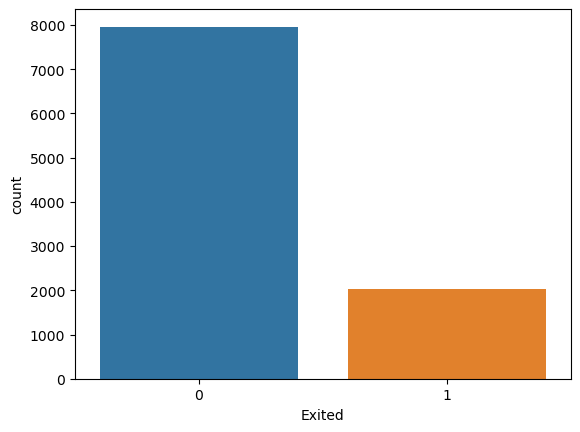

In [11]:
sns.countplot(x='Exited', data=CHURN)
plt.show()

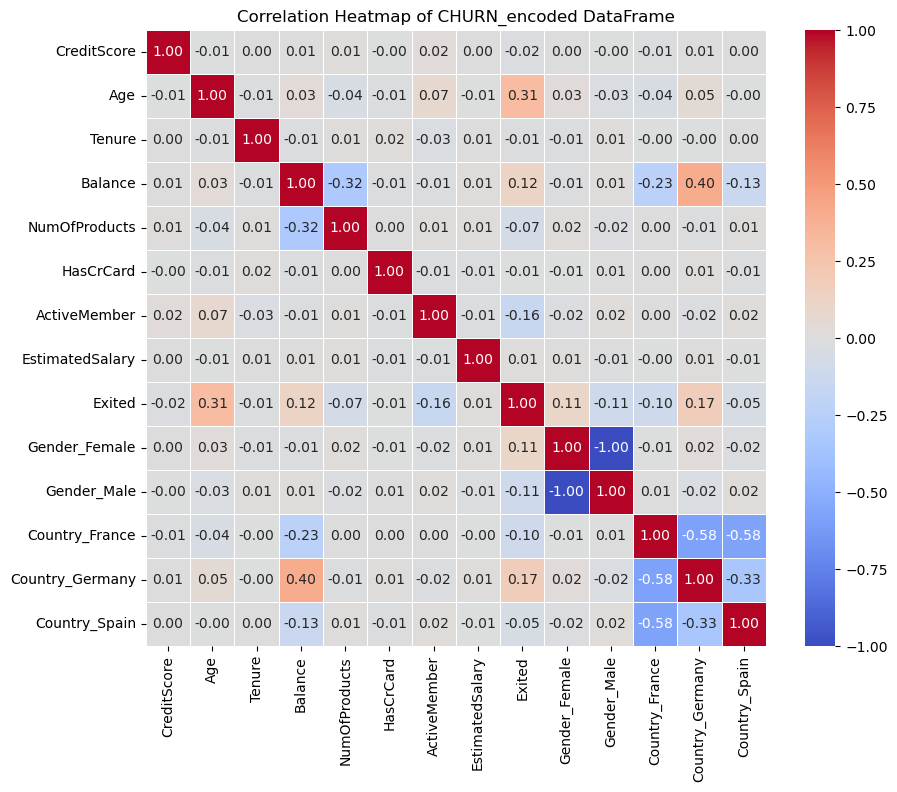

Summary statistics of scaled columns:
        CreditScore           Age        Tenure       Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean       0.452220      0.469564      0.501280      0.304848       0.262100   
std        0.258119      0.221516      0.289217      0.248696       0.280466   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.263158      0.318182      0.300000      0.000000       0.000000   
50%        0.451524      0.431818      0.500000      0.387402       0.000000   
75%        0.634349      0.590909      0.700000      0.508749       0.500000   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

         HasCrCard  ActiveMember  EstimatedSalary  
count  10000.00000  10000.000000     10000.000000  
mean       0.70550      0.515100         0.500441  
std        0.45584      0.499797         0.287580  
min        0.00000      0.000000 

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
# The correlation matrix is a table showing correlation coefficients between variables. 
# Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1.
# If two variables have high correlation, you might only need to keep one of them for modeling.
correlation_matrix = CHURN_encoded.corr()

# Generate a heatmap
# A heatmap is an effective way to visualize the correlation matrix. 
# Colors represent the magnitude of the correlations; for example, a strong positive or negative correlation might be shown in red or blue, 
# while weaker correlations are shown in lighter colors.
plt.figure(figsize=(10, 8)) # This line specifies the size of the figure to make the heatmap larger and more readable.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# annot=True displays the correlation values in the heatmap.
# cmap='coolwarm' is a type of colormap that visually distinguishes high and low values.
# fmt='.2f' formats the annotation to two decimal places.
# linewidths=.5 adds lines between cells to make the heatmap clearer.

plt.title('Correlation Heatmap of CHURN_encoded DataFrame')
# Adds a title to the heatmap for clarity and context.

plt.show()
# This line renders the heatmap. Without this, the heatmap won't be displayed in some environments.


# To confirm changes, display the summary statistics for the scaled columns
print("Summary statistics of scaled columns:")
print(CHURN_encoded[numerical_columns].describe())


# MODELING OF PREPROCESSED DATA

Accuracy: 0.788
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.71      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



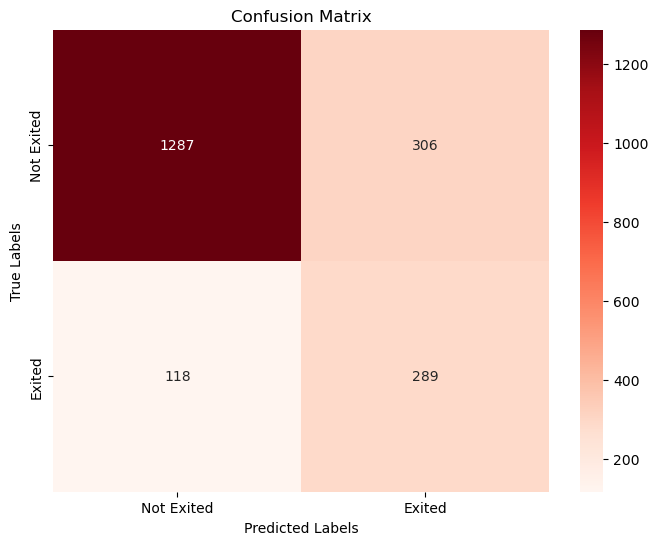

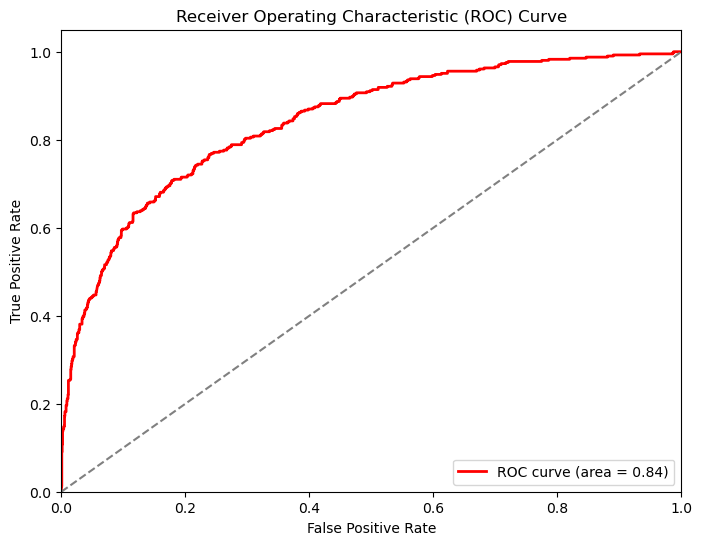

Training Performance:
Accuracy: 0.8057
F1 Score: 0.8178
Precision: 0.8442
Recall: 0.8057

Testing Performance:
Accuracy: 0.7880
F1 Score: 0.8012
Precision: 0.8284
Recall: 0.7880


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns  # Importing seaborn for visualization

# CHURN_encoded is previously defined and preprocessed DataFrame
# 'Exited' is the target variable in the 'CHURN_encoded' DataFrame
X = CHURN_encoded.drop('Exited', axis=1)
y = CHURN_encoded['Exited']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the SVM classifier
classifier = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]  # For ROC curve

# Metrics Calculation
training_accuracy = accuracy_score(y_train, classifier.predict(X_train))
testing_accuracy = accuracy_score(y_test, y_pred)
training_f1 = f1_score(y_train, classifier.predict(X_train), average='weighted')
testing_f1 = f1_score(y_test, y_pred, average='weighted')
training_precision = precision_score(y_train, classifier.predict(X_train), average='weighted')
testing_precision = precision_score(y_test, y_pred, average='weighted')
training_recall = recall_score(y_train, classifier.predict(X_train), average='weighted')
testing_recall = recall_score(y_test, y_pred, average='weighted')

# Output results
print("Accuracy:", testing_accuracy)
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Output detailed training and testing performance metrics
print('Training Performance:')
print(f'Accuracy: {training_accuracy:.4f}')
print(f'F1 Score: {training_f1:.4f}')
print(f'Precision: {training_precision:.4f}')
print(f'Recall: {training_recall:.4f}')

print('\nTesting Performance:')
print(f'Accuracy: {testing_accuracy:.4f}')
print(f'F1 Score: {testing_f1:.4f}')
print(f'Precision: {testing_precision:.4f}')
print(f'Recall: {testing_recall:.4f}')


# Performance Metrics Explained
Accuracy is the proportion of true results among the total number of cases examined. It is expressed as:
Accuracy = (TP + TN) / (TP + TN + FP + FN) = (289 + 1287) / (289 + 1287 + 306 + 118)
Precision is the fraction of relevant instances among the retrieved instances. It focuses on the model's performance in predicting the no-churn cases:
Precision = TP / (TP + FP) = 289 / (289 + 306)
Recall, also known as sensitivity or the True Positive Rate, is the fraction of relevant instances that were retrieved. It evaluates how well the model identifies customers who will not churn:
Recall = TP / (TP + FN) = 289 / (289 + 118)
F1 Score is the harmonic mean of precision and recall, providing a balance between the two by considering both false positives and false negatives:
F1 Score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (289 / (289 + 306) * 289 / (289 + 118)) / (289 / (289 + 306) + 289 / (289 + 118))


#The ROC Curve is a graphical representation that illustrates the capability of a binary classification model.

An AUC of 0.84 suggests a high level of model performance, meaning the model has an 84% chance of correctly differentiating between a randomly chosen churned customer and a non-churned customer.
The curve’s significant distance from the 45-degree diagonal line (representing random chance) confirms the model’s discriminatory power.

In [31]:
# 'Gender_Male' and 'Gender_Female' are encoded as binary columns (1 or 0).
# The 'Exited' column is the target variable you're predicting, with 1 indicating exited and 0 not exited.

# Get the number of males and females in the test set
male_count = X_test['Gender_Male'].sum()
female_count = X_test['Gender_Female'].sum()

# Get the number of males and females who exited
exited_males = X_test['Gender_Male'][y_test == 1].sum()
exited_females = X_test['Gender_Female'][y_test == 1].sum()

# Store these counts in a dictionary similar to gender_counts
real_gender_counts = {
    'Male': {
        'Total': male_count,
        'Exited': exited_males
    },
    'Female': {
        'Total': female_count,
        'Exited': exited_females
    }
}

# Output the real counts
real_gender_counts


{'Male': {'Total': 1070, 'Exited': 174},
 'Female': {'Total': 930, 'Exited': 233}}

In [14]:
# Check if 'Gender_Male' column exists in X_test
if 'Gender_Male' in X_test.columns:
    male_indices = X_test.index[X_test['Gender_Male'] == 1].tolist()
else:
    print("Column 'Gender_Male' does not exist in X_test")

# Similarly, check if 'Gender_Female' exists if you are using that as well
if 'Gender_Female' in X_test.columns:
    female_indices = X_test.index[X_test['Gender_Female'] == 1].tolist()
else:
    print("Column 'Gender_Female' does not exist in X_test")

# Print the column names to see what is actually in X_test
print(X_test.columns)


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'ActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male',
       'Country_France', 'Country_Germany', 'Country_Spain'],
      dtype='object')


In [23]:
# Extracting indices for males
male_indices = X_test.index[X_test['Gender_Male'] == 1].tolist()

# Extracting indices for females
female_indices = X_test.index[X_test['Gender_Female'] == 1].tolist()

# Output the indices
print("Male indices:", male_indices)
print("Female indices:", female_indices)


Male indices: [5702, 3667, 5673, 8270, 7079, 845, 5495, 5622, 2636, 4799, 5047, 6238, 6984, 1155, 3809, 9458, 5762, 3982, 6041, 3958, 8310, 7192, 6171, 5832, 5386, 6433, 161, 2328, 71, 2717, 4668, 4040, 5911, 5469, 5345, 1020, 593, 1529, 7922, 1355, 243, 5010, 255, 259, 1665, 8490, 2498, 6677, 8838, 8023, 8144, 2917, 7552, 5102, 958, 2798, 2415, 778, 1290, 7911, 4504, 730, 307, 901, 7518, 8349, 974, 6545, 9711, 7511, 8139, 8462, 2023, 4275, 4122, 2114, 9161, 6310, 5360, 9864, 201, 9457, 4372, 7601, 6063, 5802, 8917, 9116, 5572, 5363, 3730, 9959, 8781, 2616, 4655, 7050, 1620, 2108, 8852, 5962, 3243, 8839, 2739, 3928, 3003, 4701, 355, 3460, 2083, 6702, 7027, 7225, 1362, 8443, 5190, 1716, 9757, 9613, 4207, 2836, 3434, 5548, 1468, 910, 968, 9159, 6454, 3512, 5942, 2916, 8858, 4368, 2307, 5518, 6595, 5457, 1711, 1232, 8009, 8241, 2611, 9850, 482, 6265, 5088, 332, 7098, 2843, 9798, 8081, 8875, 6460, 6116, 1041, 3938, 8027, 5138, 4855, 8964, 4554, 2704, 7645, 4833, 1026, 3183, 4192, 9862, 931

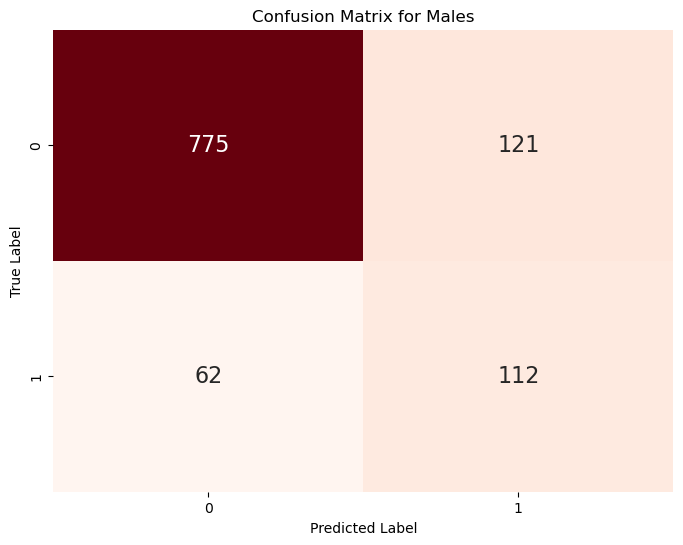

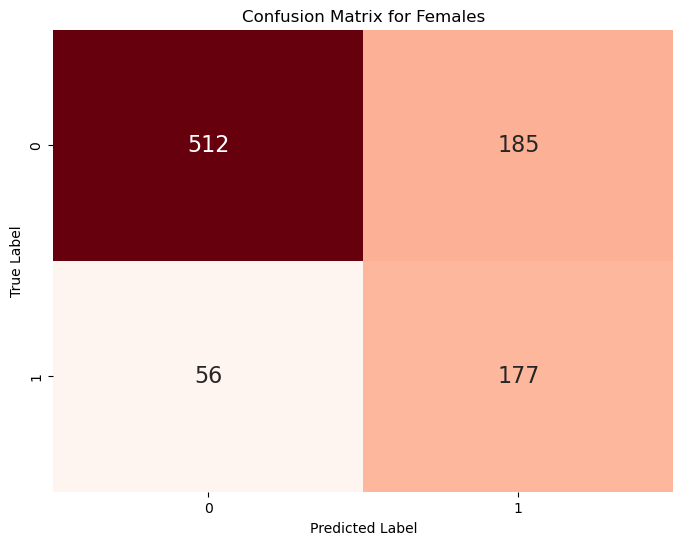

Performance Metrics for Males:
Accuracy: 0.8289719626168224
Precision: 0.48068669527896996
Recall: 0.6436781609195402
F1 Score: 0.5503685503685504

Performance Metrics for Females:
Accuracy: 0.7408602150537634
Precision: 0.4889502762430939
Recall: 0.759656652360515
F1 Score: 0.5949579831932773

Fairness Metrics:
Equal Accuracy Difference: 0.08811174756305895
Demographic Parity Difference: 0.17149030248216257
Equal Opportunity Difference: 0.11597849144097483


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Create boolean masks for male and female in the test dataset
male_mask = X_test['Gender_Male'] == 1
female_mask = X_test['Gender_Female'] == 1

# Step 2: Use boolean indexing with masks to split y_test and y_pred arrays
y_test_male = y_test[male_mask]
y_pred_male = y_pred[male_mask]
y_test_female = y_test[female_mask]
y_pred_female = y_pred[female_mask]

# Step 3: Calculate confusion matrices
cm_male = confusion_matrix(y_test_male, y_pred_male)
cm_female = confusion_matrix(y_test_female, y_pred_female)

# Step 4: Compute performance metrics for each group
accuracy_male = accuracy_score(y_test_male, y_pred_male)
precision_male = precision_score(y_test_male, y_pred_male)
recall_male = recall_score(y_test_male, y_pred_male)
f1_score_male = f1_score(y_test_male, y_pred_male)

accuracy_female = accuracy_score(y_test_female, y_pred_female)
precision_female = precision_score(y_test_female, y_pred_female)
recall_female = recall_score(y_test_female, y_pred_female)
f1_score_female = f1_score(y_test_female, y_pred_female)

# Step 5: Calculate fairness metrics
# Equal Accuracy
equal_accuracy = abs(accuracy_male - accuracy_female)


# Given values from the confusion matrices for males and females
TP_male = 112
FP_male = 121
TN_male = 775
FN_male = 62

TP_female = 177
FP_female = 185
TN_female = 512
FN_female = 56

# Calculate Demographic Parity for males and females using the new formula
demographic_parity_male = (TP_male + FP_male) / (TP_male + FP_male + TN_male + FN_male)
demographic_parity_female = (TP_female + FP_female) / (TP_female + FP_female + TN_female + FN_female)
demographic_parity_difference = abs(demographic_parity_male - demographic_parity_female)

# Calculate the Demographic Parity Difference
demographic_parity_difference = abs(demographic_parity_male - demographic_parity_female)

# Equal Opportunity Difference
equal_opportunity_male = cm_male[1][1] / (cm_male[1][1] + cm_male[1][0])  # TP / (TP + FN)
equal_opportunity_female = cm_female[1][1] / (cm_female[1][1] + cm_female[1][0])  # TP / (TP + FN)
equal_opportunity_difference = abs(equal_opportunity_male - equal_opportunity_female)


# Plotting function for confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', cbar=False, annot_kws={"size": 16})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_male, 'Confusion Matrix for Males')
plot_confusion_matrix(cm_female, 'Confusion Matrix for Females')

# Print results
print("Performance Metrics for Males:")
print(f"Accuracy: {accuracy_male}")
print(f"Precision: {precision_male}")
print(f"Recall: {recall_male}")
print(f"F1 Score: {f1_score_male}\n")

print("Performance Metrics for Females:")
print(f"Accuracy: {accuracy_female}")
print(f"Precision: {precision_female}")
print(f"Recall: {recall_female}")
print(f"F1 Score: {f1_score_female}\n")

print("Fairness Metrics:")
print(f"Equal Accuracy Difference: {equal_accuracy}")
print(f"Demographic Parity Difference: {demographic_parity_difference}")
print(f"Equal Opportunity Difference: {equal_opportunity_difference}")


